# Análise dos dados

Esse notebook tem como objetivo extrair informações dos arquivos de métricas gerados pelas execuções dos experimentos. Nele serão gerados os gráficos que compõem o relatório desse trabalho e servirão de base para a argumentação quanto a eficiência e qualidade dos resultados propostos.

In [117]:

# Importação de blibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração geral do estilo
sns.set(style="whitegrid")

In [2]:
# Leitura dos dados
twice_chris_df = pd.read_csv('Results\SimulationV1-laboratory.csv')
bnb_df = pd.read_csv('Results\SimulationV1-bnb-laboratory.csv')

# Concatenação dos dataframes
dataframe = pd.concat([twice_chris_df, bnb_df], ignore_index=True)

# Correção no cálculo da qualidade das soluções
dataframe['quality'] = dataframe.apply(
        lambda row: abs((row['solution'] / row['optimal-solution']) - 1)
        if pd.notnull(row['solution']) and pd.notnull(row['optimal-solution']) else None, axis=1
    )

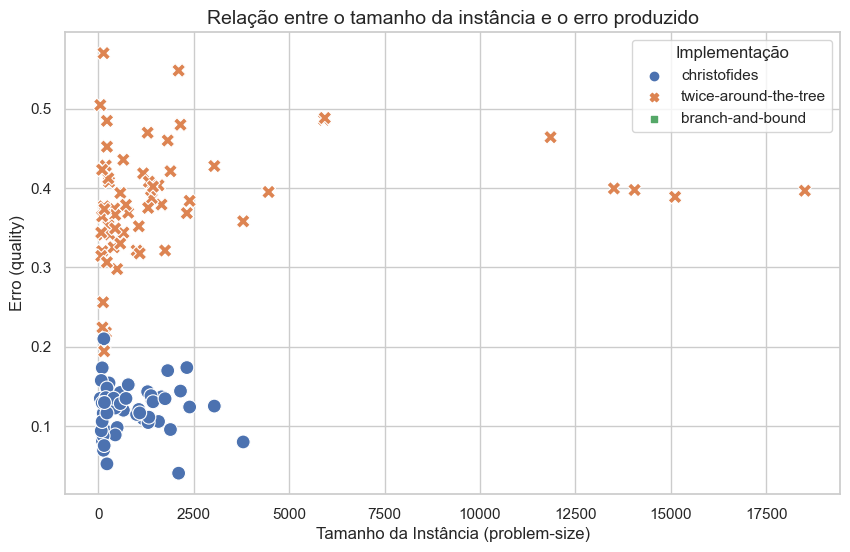

In [3]:
# Gráfico 1: Relação entre tamanho da instância e erro (quality)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x="problem-size", y="quality", hue="algorithm", style="algorithm", s=100)
plt.title("Relação entre o tamanho da instância e o erro produzido", fontsize=14)
plt.xlabel("Tamanho da Instância (problem-size)", fontsize=12)
plt.ylabel("Erro (quality)", fontsize=12)
plt.legend(title="Implementação", loc="upper right")
plt.show()

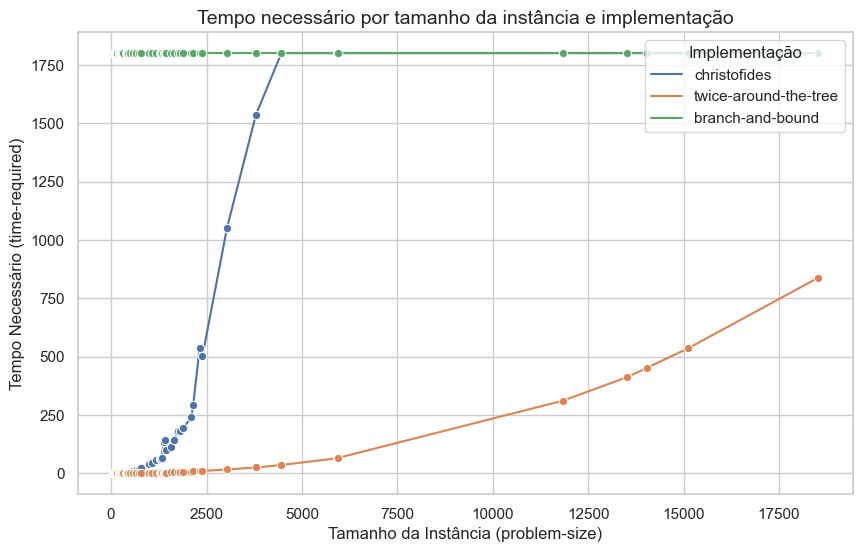

In [4]:
# Gráfico 2: Comparação de desempenho (tempo) por implementação e tamanho da instância
plt.figure(figsize=(10, 6))
sns.lineplot(data=dataframe, x="problem-size", y="time-required", hue="algorithm", marker="o")
plt.title("Tempo necessário por tamanho da instância e implementação", fontsize=14)
plt.xlabel("Tamanho da Instância (problem-size)", fontsize=12)
plt.ylabel("Tempo Necessário (time-required)", fontsize=12)
plt.legend(title="Implementação", loc="upper right")
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_5732\804174695.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=dataframe, x="algorithm", y="space-required", ci="sd", palette="muted")


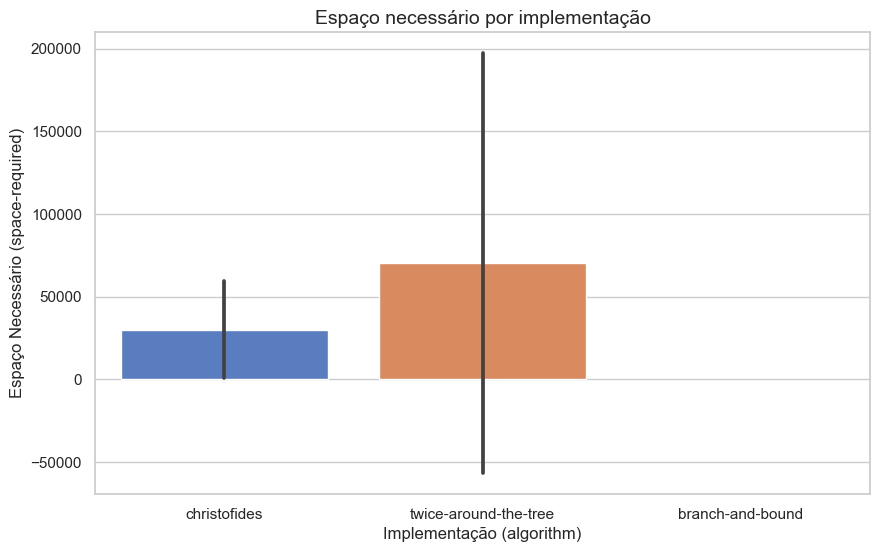

In [5]:
# Gráfico 3: Comparação do espaço necessário por implementação
plt.figure(figsize=(10, 6))
sns.barplot(data=dataframe, x="algorithm", y="space-required", ci="sd", palette="muted")
plt.title("Espaço necessário por implementação", fontsize=14)
plt.xlabel("Implementação (algorithm)", fontsize=12)
plt.ylabel("Espaço Necessário (space-required)", fontsize=12)
plt.show()

# Twice Around the Tree x Christofides


In [130]:
df_without_bnb = dataframe[dataframe["algorithm"] != "branch-and-bound"]
twice = dataframe[dataframe["algorithm"] == "twice-around-the-tree"]
christofides = dataframe[dataframe["algorithm"] == "christofides"]

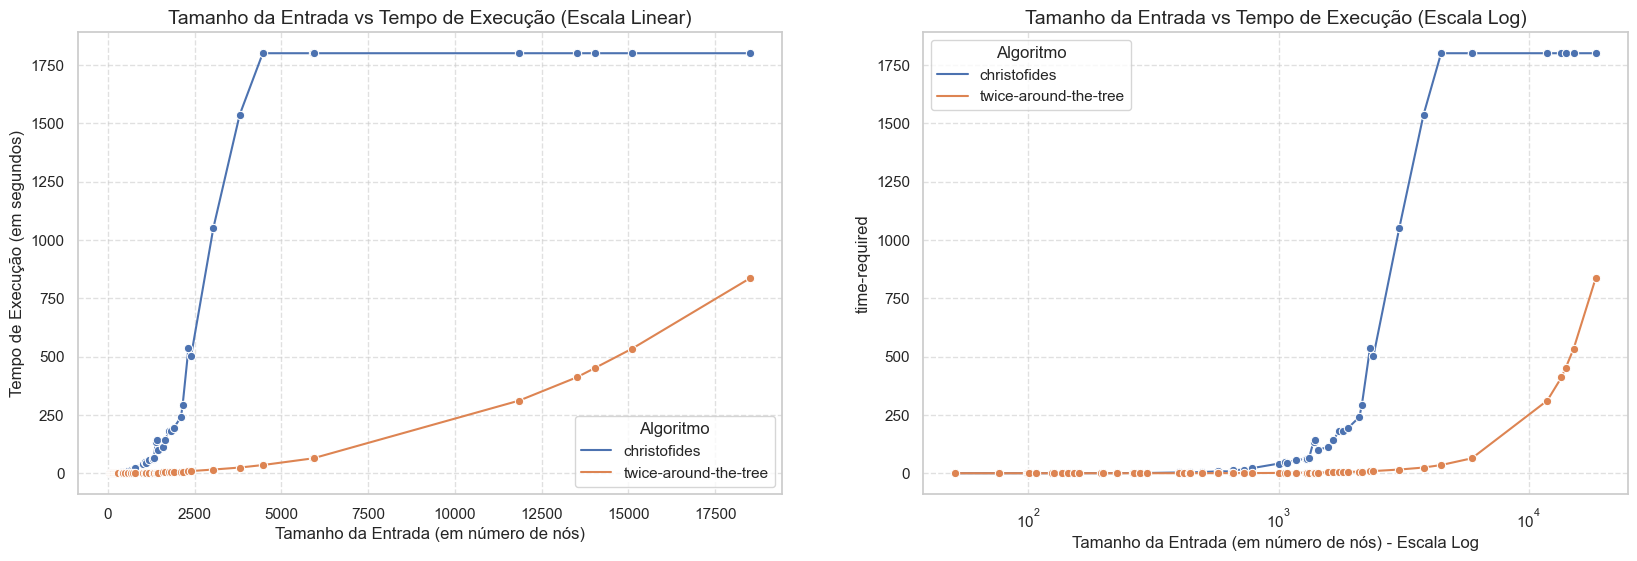

In [192]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  

sns.lineplot(data=df_without_bnb, x="problem-size", y="time-required", hue="algorithm", marker="o", ax=axes[0])
axes[0].set_title("Tamanho da Entrada vs Tempo de Execução (Escala Linear)", fontsize=14)
axes[0].set_xlabel("Tamanho da Entrada (em número de nós)", fontsize=12)
axes[0].set_ylabel("Tempo de Execução (em segundos)", fontsize=12)
axes[0].legend(title="Algoritmo")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.lineplot(data=df_without_bnb, x="problem-size", y="time-required", hue="algorithm", marker="o", ax=axes[1])
axes[1].set_title("Tamanho da Entrada vs Tempo de Execução (Escala Log)", fontsize=14)
axes[1].set_xlabel("Tamanho da Entrada (em número de nós) - Escala Log", fontsize=12)
axes[1].set_xscale("log")
axes[1].legend(title="Algoritmo")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.show()


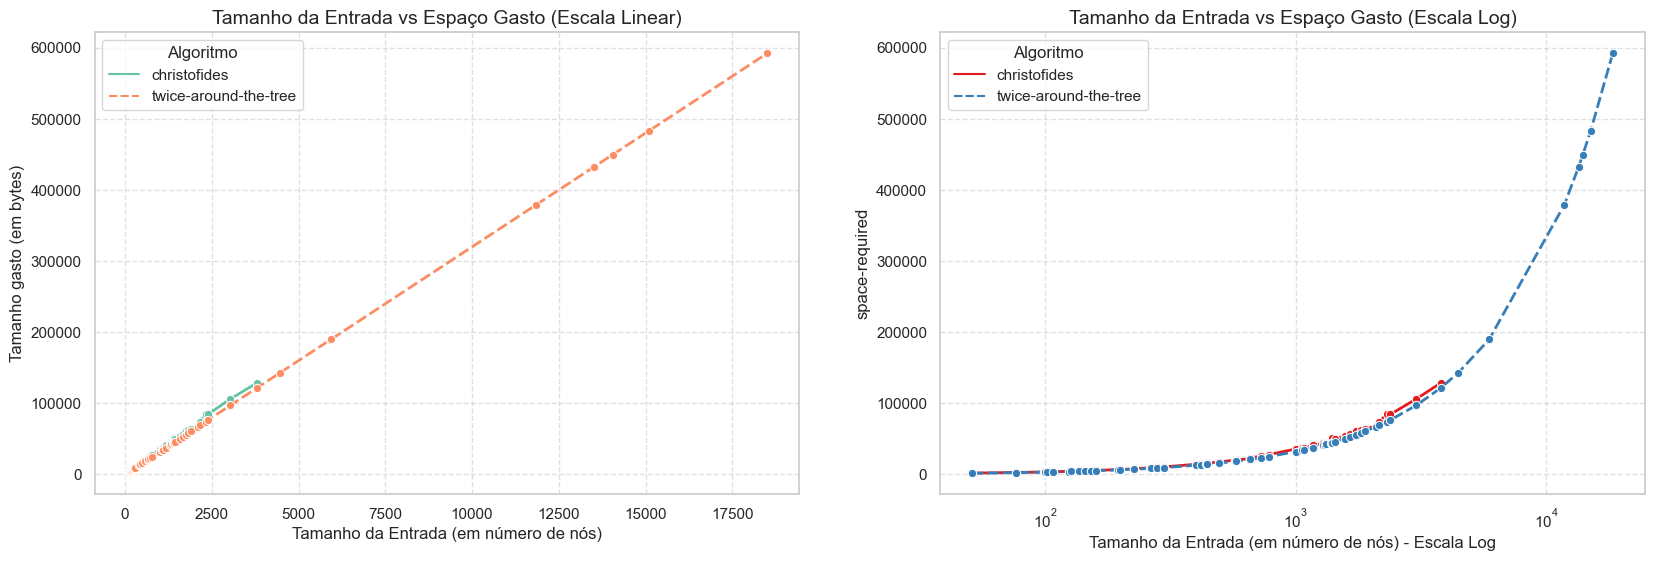

In [193]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  

sns.lineplot(data=df_without_bnb, x="problem-size", y="space-required", hue="algorithm", marker="o", 
             ax=axes[0], palette="Set2", style="algorithm", linewidth=2)
axes[0].set_title("Tamanho da Entrada vs Espaço Gasto (Escala Linear)", fontsize=14)
axes[0].set_xlabel("Tamanho da Entrada (em número de nós)", fontsize=12)
axes[0].set_ylabel("Tamanho gasto (em bytes)", fontsize=12)
axes[0].legend(title="Algoritmo")
axes[0].grid(True, linestyle="--", alpha=0.6)

sns.lineplot(data=df_without_bnb, x="problem-size", y="space-required", hue="algorithm", marker="o", 
             ax=axes[1], palette="Set1", style="algorithm", linewidth=2)
axes[1].set_title("Tamanho da Entrada vs Espaço Gasto (Escala Log)", fontsize=14)
axes[1].set_xlabel("Tamanho da Entrada (em número de nós) - Escala Log", fontsize=12)
axes[1].set_xscale("log")
axes[1].legend(title="Algoritmo")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.show()


In [150]:
twice.loc[:, "percentage-deviation-t"] = (
    abs(twice["solution"] - twice["optimal-solution"]) / twice["optimal-solution"]
) * 100

# Calcular o desvio médio percentual para Twice Around the Tree
mean_percentage_deviation_t = twice["percentage-deviation-t"].mean()

print(f"Desvio Médio do algoritmo Twice Around the Tree em relação à solução ótima: {mean_percentage_deviation_t}%")

christofides.loc[:, "percentage-deviation-c"] = (
    abs(christofides["solution"] - christofides["optimal-solution"]) / christofides["optimal-solution"]
) * 100

# Calcular o desvio médio percentual para Christofides
mean_percentage_deviation_c = christofides["percentage-deviation-c"].mean()

print(f"Desvio Médio do algoritmo de Christofides em relação à solução ótima: {mean_percentage_deviation_c}%")


Desvio Médio do algoritmo Twice Around the Tree em relação à solução ótima: 38.36187118148608%
Desvio Médio do algoritmo de Christofides em relação à solução ótima: 12.22205809319589%


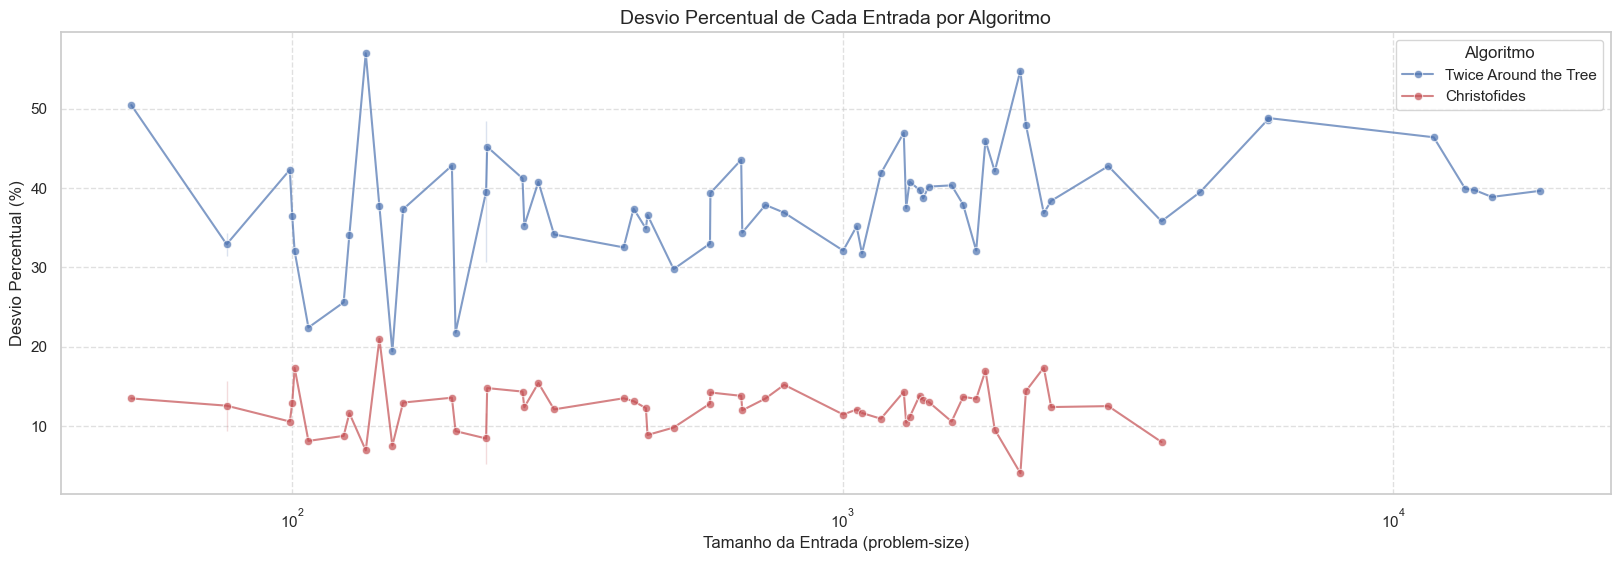

In [197]:
plt.figure(figsize=(20, 6))

sns.lineplot(
    data=twice, 
    x="problem-size", 
    y="percentage-deviation-t", 
    color="b", 
    label="Twice Around the Tree",
    marker="o",
    alpha=0.7  
)

sns.lineplot(
    data=christofides, 
    x="problem-size", 
    y="percentage-deviation-c", 
    color="r", 
    marker="o",
    label="Christofides",
    alpha=0.7
)

plt.title("Desvio Percentual de Cada Entrada por Algoritmo", fontsize=14)
plt.xlabel("Tamanho da Entrada (problem-size)", fontsize=12)
plt.ylabel("Desvio Percentual (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Algoritmo")
plt.xscale('log')

plt.show()


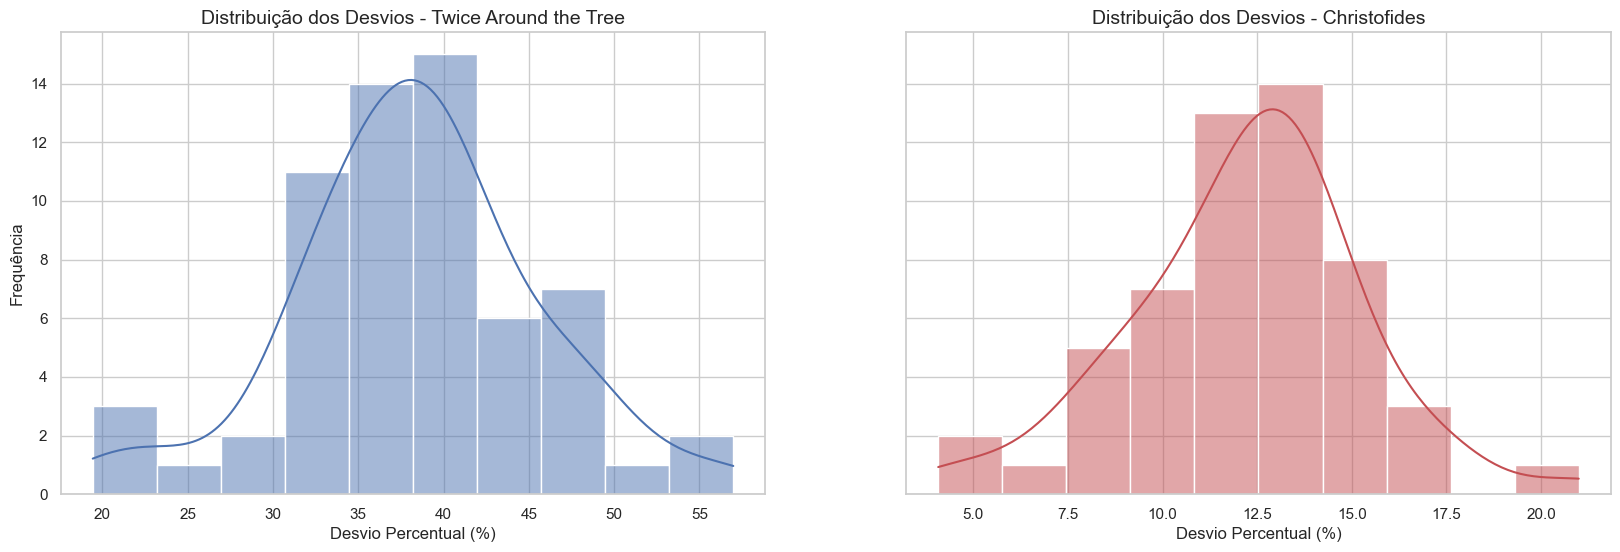

In [ ]:
# Gráfico 4: Histograma com a frequência de erros.
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

sns.histplot(
    twice["percentage-deviation-t"], 
    bins=10, 
    color="b", 
    kde=True,  
    ax=axes[0]
)
axes[0].set_title("Distribuição dos Desvios - Twice Around the Tree", fontsize=14)
axes[0].set_xlabel("Desvio Percentual (%)", fontsize=12)
axes[0].set_ylabel("Frequência", fontsize=12)

sns.histplot(
    christofides["percentage-deviation-c"], 
    bins=10, 
    color="r", 
    kde=True,  
    ax=axes[1]
)
axes[1].set_title("Distribuição dos Desvios - Christofides", fontsize=14)
axes[1].set_xlabel("Desvio Percentual (%)", fontsize=12)

plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_5732\3102856589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twice["solution-difference-percent"] = (


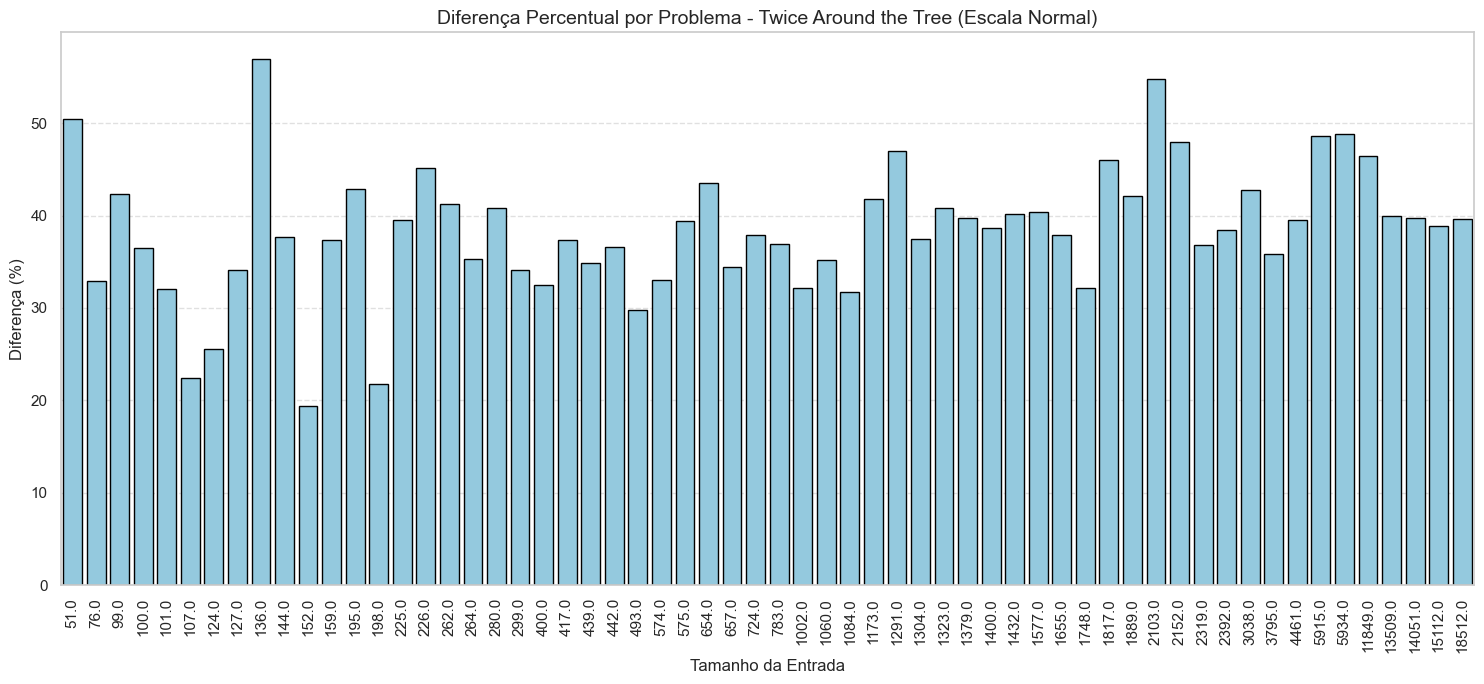

In [210]:
# Adicionando uma coluna com a diferença percentual
twice["solution-difference-percent"] = (
    abs(twice["solution"] - twice["optimal-solution"]) / twice["optimal-solution"] * 100
)

# Ordenando os dados
twice_sorted = twice.sort_values(by="problem-size")

# Criando o gráfico
plt.figure(figsize=(15, 7))  
sns.barplot(
    data=twice_sorted, 
    x="problem-size", 
    y="solution-difference-percent", 
    color="skyblue", 
    edgecolor="black", 
    errorbar=None
)
plt.title("Diferença Percentual por Problema - Twice Around the Tree (Escala Normal)", fontsize=14)
plt.xlabel("Tamanho da Entrada", fontsize=12)
plt.ylabel("Diferença (%)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_5732\2540110321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  christofides["solution-difference-percent"] = (


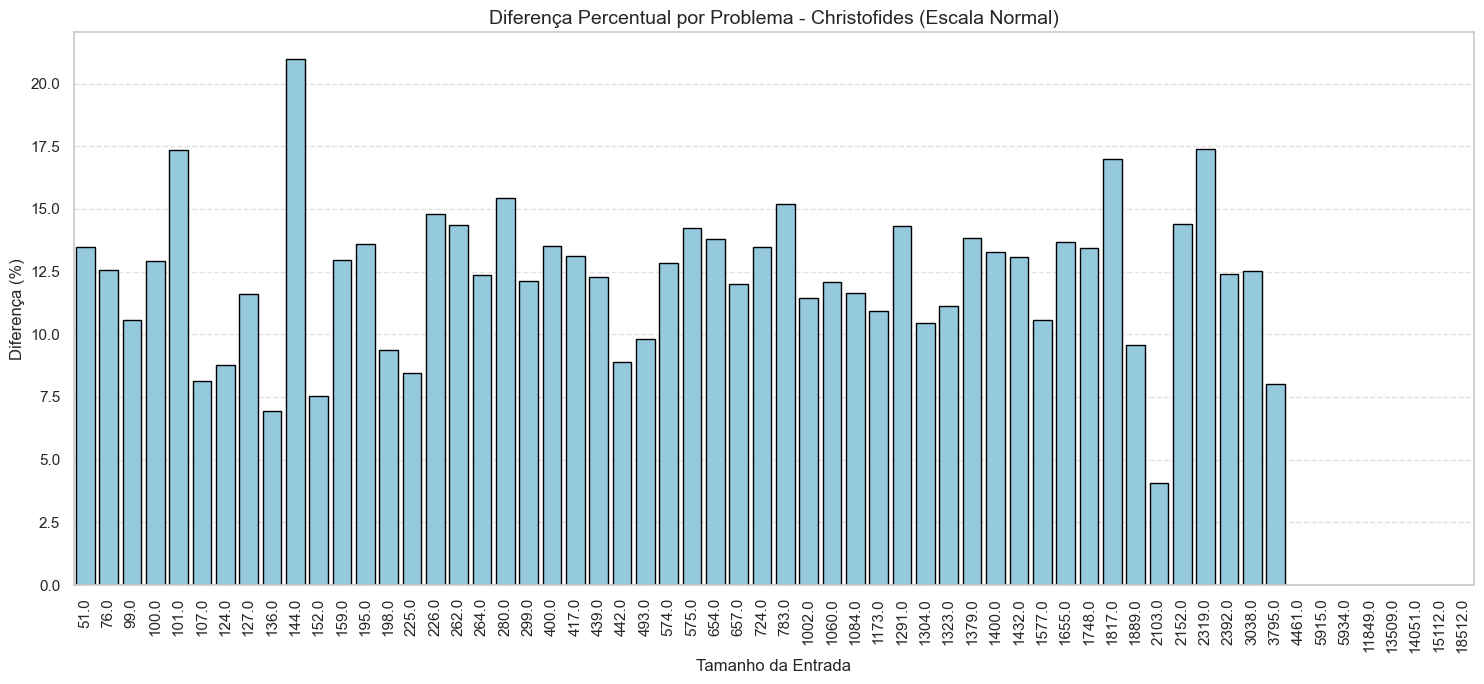

In [212]:
# Adicionando uma coluna com a diferença percentual
christofides["solution-difference-percent"] = (
    abs(christofides["solution"] - christofides["optimal-solution"]) / christofides["optimal-solution"] * 100
)

# Ordenando os dados
christofides_sorted = christofides.sort_values(by="problem-size")

# Criando o gráfico
plt.figure(figsize=(15, 7))  
sns.barplot(
    data=christofides_sorted, 
    x="problem-size", 
    y="solution-difference-percent", 
    color="skyblue", 
    edgecolor="black", 
    errorbar=None
)
plt.title("Diferença Percentual por Problema - Christofides (Escala Normal)", fontsize=14)
plt.xlabel("Tamanho da Entrada", fontsize=12)
plt.ylabel("Diferença (%)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()
